# 12. fraud detection

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//dataset//creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


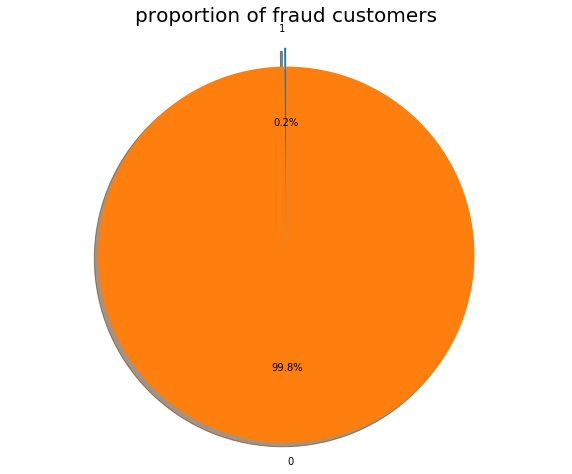

In [5]:
labels = '1', '0'
sizes = [data.Class[data['Class']==1].count(), data.Class[data['Class']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("proportion of fraud customers", size = 20)
plt.show()

0    284315
1       492
Name: Class, dtype: int64


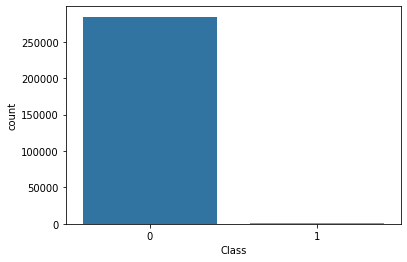

In [9]:
print(data['Class'].value_counts())
sns.countplot(data['Class'])

Text(0, 0.5, 'Frequency')

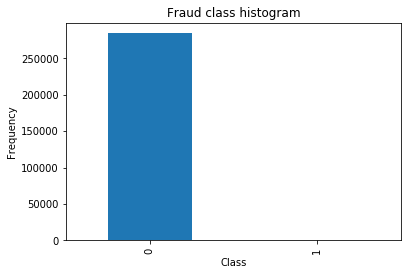

In [3]:
#Checking the target classes
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

### Setting our input and target variables + resampling.
1. Normalising the amount column. The amount column is not in line with the anonimised features.

In [10]:

from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

AttributeError: 'Series' object has no attribute 'reshape'

In [11]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [12]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Splitting data into train and test set. Cross validation will be used when calculating accuracies.

In [13]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


### Logistic regression classifier - Undersampled data
We are very interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:

Accuracy = (TP+TN)/total
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.¶
Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.
We could even apply a cost function when having FN and FP with different weights for each type of error, but let's leave that aside for now.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

Very ad-hoc function to print K_fold_scores

In [34]:
from sklearn.model_selection import StratifiedKFold
best_c = StratifiedKFold(n_splits=2)
#best_c.printing_Kfold_scores(X_train_undersample,y_train_undersample)

In [35]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

TypeError: __init__() got multiple values for argument 'shuffle'

In [31]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Penalty term must be positive; got (C=StratifiedKFold(n_splits=2, random_state=None, shuffle=False))

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,roc_curve,auc

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
# loading data
df = pd.read_csv("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//dataset//creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2. summarizing and visualizing data

In [3]:
## Analyse the Data
#  Dispcriptive statistics
df.shape       # shape - gives the total number of rows and columns
                      # it has 284807 rows and 31 columns

(284807, 31)

In [4]:
df.head()            # head () function - gives the top 5 rows
                     # it has 'Time' 'Amount' 'Class' and 28Variables(for security reasons actuall names are hidden and represented as V1,V2..etc.,)
                     # from the Table data identify 'Features(input)' and 'Labels(output)'
                     # As per the Data we Decide 'Class' is Our Label/output
                         # Class = 0 --No Fraud
                         # Class = 1 -- Fraud
                     # remaining all Columns we are taking as our 'Features(inputs)'
                     # check for CATOGORICAL Values , if there are any Catogorical Values convert it into "numerical format"
                     # as ML understands only Numerical format data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# checking datatypes   
df.info()           # all the features are of float datatype except the 'Class' which is of int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# check for missing values in each feature and label
df.isnull().sum()       # missing values represented by 1 or more than 1
                           # no missing values represented by  0
                           # here there are no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# statistical summary of the data 
# mean,standard deviation,count etc.,
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Visualization

In [8]:
# Check the Class distribution of 'Output Class'
# to identify whether our data is 'Balanced' or 'Imbalanced'

print(df['Class'].value_counts() )      # 0 - NonFraud Class
                                        # 1 - Fraud Class

# to get in percentage use 'normalize = True'
print('\nNoFrauds = 0 | Frauds = 1\n')
print(df['Class'].value_counts(normalize = True)*100)

0    284315
1       492
Name: Class, dtype: int64

NoFrauds = 0 | Frauds = 1

0    99.827251
1     0.172749
Name: Class, dtype: float64


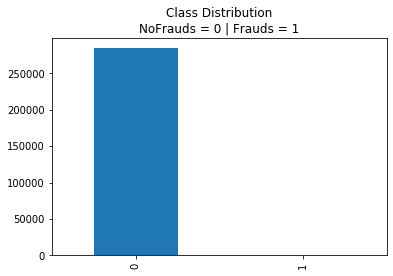

In [9]:
# visualizing throug bar graph
df['Class'].value_counts().plot(kind = 'bar', title = 'Class Distribution\nNoFrauds = 0 | Frauds = 1'); # semicolon(;) to avoid '<matplotlib.axes._subplots.AxesSubplot at 0xe81c4b518>' in output

#### preparing Data

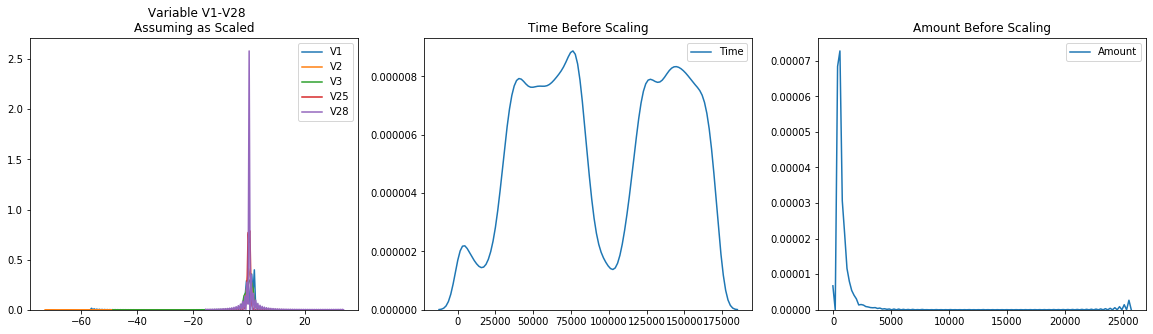

In [10]:
# No Missing Data, No Duplicates
# No Feature Selection as the feature names are hidden for security reasons
# 
# As the Data is PCA transformed we assume that the variables v1 - v28 are scaled 
# we scale leftout 'Time' and 'Amount' features


#visualizing through density plots using seaborn
import seaborn as sns
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 5))

ax1.set_title(' Variable V1-V28\nAssuming as Scaled')  # plotting only few variables
sns.kdeplot(df['V1'], ax=ax1)                          # kde - kernel density estimate
sns.kdeplot(df['V2'], ax=ax1)
sns.kdeplot(df['V3'], ax=ax1)
sns.kdeplot(df['V25'], ax=ax1)
sns.kdeplot(df['V28'], ax=ax1)

ax2.set_title('Time Before Scaling')
sns.kdeplot(df['Time'], ax=ax2)

ax3.set_title('Amount Before Scaling')            
sns.kdeplot(df['Amount'], ax=ax3)

plt.show()

In [11]:
#Scaling data using RobustScaler
from sklearn.preprocessing import StandardScaler,RobustScaler
rb = RobustScaler()
df['Time'] = rb.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rb.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


Why Accuracy Metric is Misleading When Dealing with Imbalanced Datasets 
Conclusion :
with almost all classifiers the accuracy is around 99.9% but there is a change in precision and recall score

so the Accuracy Metric when working with imbalance datasets are misleading (very high)

In [12]:
# lets Analyse why the accuracy is misleading(high) 

x = df.drop('Class',axis = 1)
y = df['Class']

#train and test split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3,random_state = 42)

# spot check algorithms
classifiers = {"Logistic Regression":LogisticRegression(),
               "DecisionTree":DecisionTreeClassifier(),
               "LDA":LinearDiscriminantAnalysis()}        
# as the dataset is too big computation time will be high
# bcoz of which iam using only 3 classifiers

for name,clf in classifiers.items():
    accuracy      = cross_val_score(clf,xTrain,yTrain,scoring='accuracy',cv = 5)
    accuracyTest  = cross_val_score(clf,xTest,yTest,scoring='accuracy',cv = 5)
    
    precision     = cross_val_score(clf,xTrain,yTrain,scoring='precision',cv = 5)
    precisionTest = cross_val_score(clf,xTest,yTest,scoring='precision',cv = 5)
    
    recall        = cross_val_score(clf,xTrain,yTrain,scoring='recall',cv= 5)
    recallTest    = cross_val_score(clf,xTest,yTest,scoring='recall',cv = 5)
    
    print(name,'---','Train-Accuracy :%0.2f%%'%(accuracy.mean()*100),
                     'Train-Precision: %0.2f%%'%(precision.mean()*100),
                     'Train-Recall   : %0.2f%%'%(recall.mean()*100))
    
    print(name,'---','Test-Accuracy :%0.2f%%'%(accuracyTest.mean()*100),
                     'Test-Precision: %0.2f%%'%(precisionTest.mean()*100),
                     'Test-Recall   : %0.2f%%'%(recallTest.mean()*100),'\n')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Logistic Regression --- Train-Accuracy :99.92% Train-Precision: 88.96% Train-Recall   : 60.97%
Logistic Regression --- Test-Accuracy :99.93% Test-Precision: 84.88% Test-Recall   : 64.05% 

DecisionTree --- Train-Accuracy :99.90% Train-Precision: 74.75% Train-Recall   : 74.44%
DecisionTree --- Test-Accuracy :99.93% Test-Precision: 80.10% Test-Recall   : 76.53% 

LDA --- Train-Accuracy :99.94% Train-Precision: 86.99% Train-Recall   : 76.42%
LDA --- Test-Accuracy :99.93% Test-Precision: 83.64% Test-Recall   : 70.63% 



 #### Random Under Sampling

1    287
0    287
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


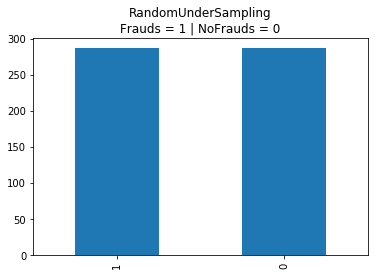

In [13]:
# 1. split the 'Original Train data ' into train & test
# 2. Oversample or UnderSample the splitted train data
# 3. fit the model with Oversample or Undersampled train data
# 4. perform 'prediction' on Oversample or Undersampled train data
# 5. Finally perform 'prediction' on Original TEST Data

#step 1
xTrain_rus,xTest_rus,yTrain_rus,yTest_rus = train_test_split(xTrain,yTrain,test_size = 0.2,random_state = 42)

#step 2
rus = RandomUnderSampler()
x_rus,y_rus = rus.fit_sample(xTrain_rus,yTrain_rus)

#converting it to DataFrame to Visualize in pandas
df_x_rus = pd.DataFrame(x_rus)
df_x_rus['target'] = y_rus
print(df_x_rus['target'].value_counts())
print(df_x_rus['target'].value_counts().plot(kind = 'bar',title = 'RandomUnderSampling\nFrauds = 1 | NoFrauds = 0'))

In [14]:
#step 3
lr = LogisticRegression()
lr.fit(x_rus,y_rus)

#step 4
yPred_rus = lr.predict(xTest_rus)

rus_accuracy = accuracy_score(yTest_rus,yPred_rus)
rus_classReport = classification_report(yTest_rus,yPred_rus)
#print('\nTrain-Accuracy %0.2f%%'%(rus_accuracy*100),
#      '\nTrain-ClassificationReport:\n',rus_classReport,'\n')

#step 5
yPred_actual = lr.predict(xTest)
test_accuracy = accuracy_score(yTest,yPred_actual)
test_classReport = classification_report(yTest,yPred_actual)
print('\nTest-Accuracy %0.2f%%'%(test_accuracy*100),
      '\n\nTest-ClassificationReport:\n',test_classReport)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Test-Accuracy 94.26% 

Test-ClassificationReport:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85307
           1       0.03      0.94      0.05       136

    accuracy                           0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443



#### Random Over Sampling

1    159204
0    159204
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


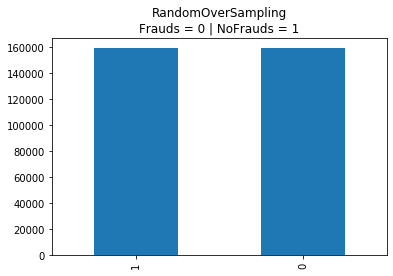

In [15]:
#step 1
xTrain_ros,xTest_ros,yTrain_ros,yTest_ros = train_test_split(xTrain,yTrain,test_size=0.2,random_state=42)

#step 2
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_sample(xTrain_ros,yTrain_ros)

#Converting it to dataframe to visualize in pandas
df_x_ros = pd.DataFrame(x_ros)
df_x_ros['target'] = y_ros
print(df_x_ros['target'].value_counts())
print(df_x_ros['target'].value_counts().plot(kind = 'bar',title = 'RandomOverSampling\nFrauds = 0 | NoFrauds = 1'))

In [16]:
#step 3
lr = LogisticRegression()
lr.fit(x_ros,y_ros)

#step 4
yPred_ros = lr.predict(xTest_ros)

ros_accuracy = accuracy_score(yTest_ros,yPred_ros)
ros_classReport = classification_report(yTest_ros,yPred_ros)
print('\nTrain-Accuracy %0.2f%%'%(rus_accuracy*100),
      '\nTrain-ClassificationReport:\n',rus_classReport,'\n')

#step 5
yPred_actual = lr.predict(xTest)
test_accuracy = accuracy_score(yTest,yPred_actual)
test_classReport = classification_report(yTest,yPred_actual)
print('\nTest-Accuracy %0.2f%%'%(test_accuracy*100),
      '\n\nTest-ClassificationReport:\n',test_classReport)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Train-Accuracy 94.12% 
Train-ClassificationReport:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     39804
           1       0.03      0.88      0.05        69

    accuracy                           0.94     39873
   macro avg       0.51      0.91      0.51     39873
weighted avg       1.00      0.94      0.97     39873
 


Test-Accuracy 97.51% 

Test-ClassificationReport:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



## SMOTE

1    159204
0    159204
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


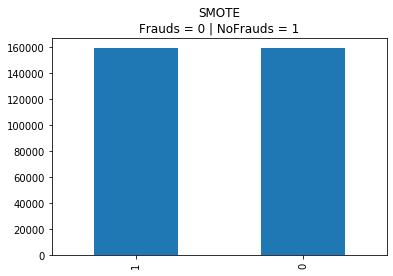

In [17]:
#step 1
xTrain_smote,xTest_smote,yTrain_smote,yTest_smote = train_test_split(xTrain,yTrain,test_size = 0.2,random_state = 42 )

#step2
smote = SMOTE()
x_smote,y_smote = smote.fit_sample(xTrain_smote,yTrain_smote)
#Converting it to dataframe to visualize in pandas
df_x_smote = pd.DataFrame(x_smote)
df_x_smote['target'] = y_smote
print(df_x_smote['target'].value_counts())
print(df_x_smote['target'].value_counts().plot(kind = 'bar',title = 'SMOTE\nFrauds = 0 | NoFrauds = 1'))

In [18]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_smote,y_smote)
ypred_smote = rfc.predict(xTest_smote)

rfc_prediction=rfc.predict(xTest)
print('RFC-Accuracy',accuracy_score(yTest,rfc_prediction),'\n')
print('Confusion_Matrix:\n',confusion_matrix(yTest,rfc_prediction),'\n')
print('Classification Report',classification_report(yTest,rfc_prediction))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC-Accuracy 0.9994967405170698 

Confusion_Matrix:
 [[85287    20]
 [   23   113]] 

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.83      0.84       136

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



RandomForestClassifier-auc : 91.53%


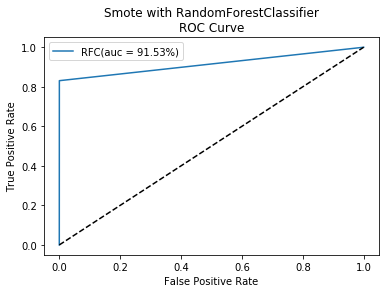

In [19]:
#auc score
rfc_fpr,rfc_tpr,_ = roc_curve(yTest,rfc_prediction)
rfc_auc = auc(rfc_fpr,rfc_tpr)
print('RandomForestClassifier-auc : %0.2f%%'%(rfc_auc * 100))

#roc curve
plt.figure()
plt.plot(rfc_fpr,rfc_tpr,label ='RFC(auc = %0.2f%%)'%(rfc_auc *100))
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('Smote with RandomForestClassifier\nROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()